# HW 5

In [3]:
import numpy as np
from matplotlib import pylab as py

## 9.4 Thermal diffusion in Earth's crust

$$ T_0(t) = A + B\sin(\frac{2\pi t}{\tau})
$$
$$ \tau = 365 days \quad A = 10^\circ C \quad B = 12^\circ C $$
$$D= 0.1m^2day^{-1}$$ 
We are trying to calc temp up to 20 meters over 10 years

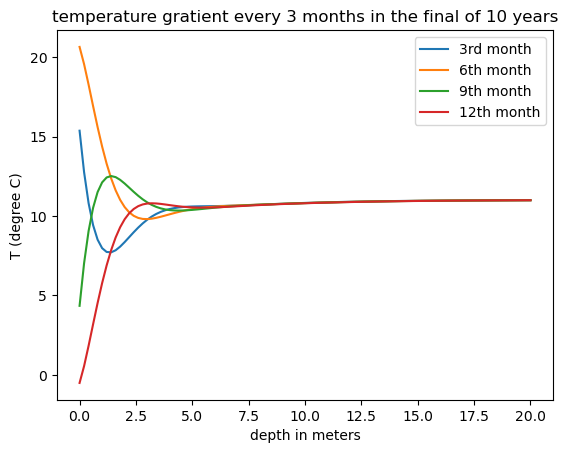

In [5]:
def T0(t):
    return A + B*np.sin(2*np.pi*t/tau)

A = 10 # degrees C
B = 12
X = np.linspace(0,20,101)
L = 20 #depth of the earth we are trying to calculate
D = 0.01 #thermal diffusion constant
N = 100 # number of gridpoints
a = L/N #grid spacing
h = 1 #days
tau = 365

Tlo = 11
Tmid = 11
Thi = T0(0)

# Create arrays
T = np.empty(N+1,float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid
Tp = np.empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

tend = 10*365 +1

# Main loop
t=0.0
c = h*D/(a*a)
while t < tend:
    
    # Calculate the new values of T
    Tp[1:N] = T[1:N] + c*(T[0:N-1]+T[2:N+1]-2*T[1:N])
    T,Tp = Tp,T
    t += h
    T[0] = T0(t) 
    if (t-9*365) >= 0 and t % 92 == 0: #I chose 92 just to get some more interesting gradients.
        py.plot(X,T)
py.title("temperature gratient every 3 months in the final of 10 years")
py.xlabel ("depth in meters")
py.ylabel("T (degree C)")
py.legend(("3rd month","6th month","9th month","12th month"))
py.show()

## Problem 2

$$ \frac{\partial^2f}{\partial^2t} = c^2\frac{\partial^2f}{\partial^2x} $$
Solving the wave equation using the leapfrog method

A)

In [130]:
def leapfrog(U,U_1):
    U1[1:N] = 2*U[1:N] - U_1[1:N] + C*(U[2:N+1] - 2*U[1:N] +U[0:N-1])
    return U1 ,U


L = 2.0 #length of string
N = 100
delt = 0.002 ; delx = L / N  ; c = 1
#timestep    ; spatial step  ; wavespeed
X = np.linspace(0,L,N+1)

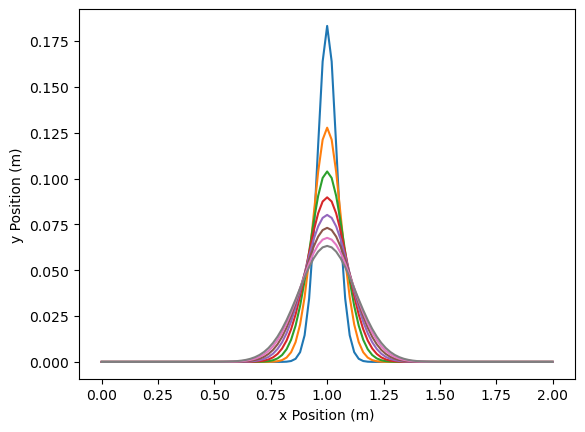

In [151]:
c = 1
C = c**2*delt**2/delx**2

### time constraints ###
runt = 4
t = 0

### initialization ###
U = np.zeros(N+1)
U1 = U
U[50] = 1
U_1 = U


while t < runt:
    U, U_1 = leapfrog(U,U_1)
    t += delt
    if t > 0.1 and round(t,4) % 0.5 == 0: #greater than 0.1 to avoid messing up the scale from the original spike
        py.plot(X,U)
py.xlabel("x Position (m)")
py.ylabel("y Position (m)")
py.show()

B) and C)

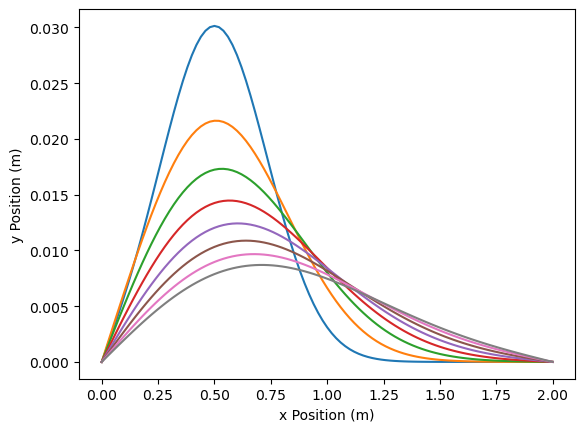

In [153]:
c = 5 # wavespeed
C = c**2*delt**2/delx**2


### time constraints ###
runt = 4
t = 0

### initialization ###
U = np.zeros(N+1)
U1 = U
U[1:N] = 0.1 * np.exp(-(X[1:N]-0.5)**2/0.01)
U_1 = U

while t < runt:
    U, U_1 = leapfrog(U,U_1)
    t += delt
    if t>= 0.2 and round(t,4) % 0.5 == 0:  #greater than 0.2 to avoid messing up the scale from the original spike
        py.plot(X,U)
py.xlabel("x Position (m)")
py.ylabel("y Position (m)")
py.show()

D)

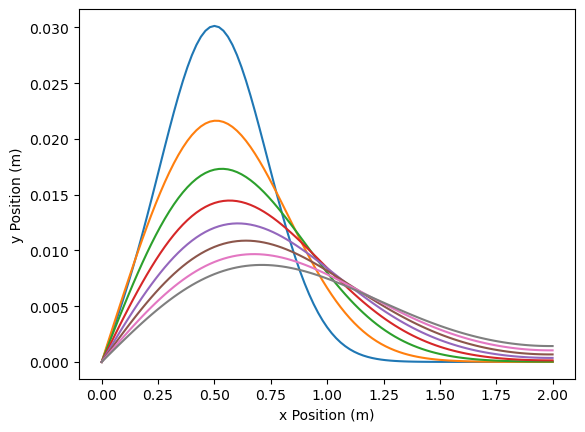

In [155]:
c = 5 #wavespeed
C = c**2*delt**2/delx**2
X = np.linspace(0,L,N+1)

### time constraints ###
runt = 4
t = 0

### initialization ###
U = np.zeros(N+1)
U1 = U
U[1:N] = 0.1 * np.exp(-(X[1:N]-0.5)**2/0.01)
U_1 = U

while t < runt:
    U, U_1 = leapfrog(U,U_1)
    U[-1] = U[-2]
    t += delt
    if t>= 0.2 and round(t,4) % 0.5 == 0:
        py.plot(X,U)
py.xlabel("x Position (m)")
py.ylabel("y Position (m)")
py.show()

Removing the clamp on the right side does not do all that much for such a short runtime and low wave speed. Running for longer periods of time shows more interesting dampening. Sort of like throwing up a blanket and having the air slowly bring it all down. Attempting to run it at higher wavespeeds quickly causes the solution to become unstable, before any interesting affects could be seen.

## Problem 3

$$ \frac{\partial f}{\partial t} +  f\frac{\partial f}{\partial x}= \nu\frac{\partial^2f}{\partial^2x} $$

In [279]:
def leapfrog2(U,U_1):
    U1[1:N] = U[1:N] + delt*(V*(U[2:N+1] - 2*U[1:N] +U[0:N-1]) - U[1:N]/delx *(U[2:N+1]-U[1:N]))
    U1[1] = U[-2] ; U1[-1] = U[1]
    return U1 ,U

L = 2.0
N = 100
delt = 0.002 ; delx = L / N  ; v = 0.05
#timestep    ; spatial step  ; wavespeed
V = v/(delx**2)

B)

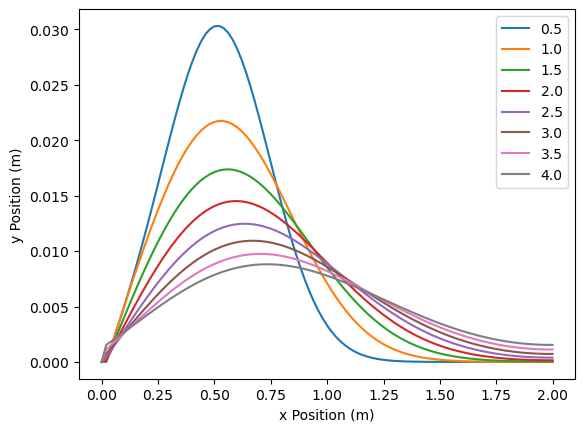

In [281]:
### initialization ###
U = np.zeros(N+1)
U1 = U
U[1:N] = 0.1 * np.exp(-(X[1:N]-0.5)**2/0.01)
U_1 = U

runt = 4
t = 0

while t < runt:
    U, U_1 = leapfrog2(U,U_1)
    t += delt
    if t>= 0.2 and round(t,4) % 0.5 == 0:
        py.plot(X,U, label = round(t,2))

py.xlabel("x Position (m)")
py.ylabel("y Position (m)")
py.legend()
py.show()

C) I have no idea why and cannot figure out a way to check but as soon as the amplitude is greater than 3.69 the program explodes into overflow errors. 

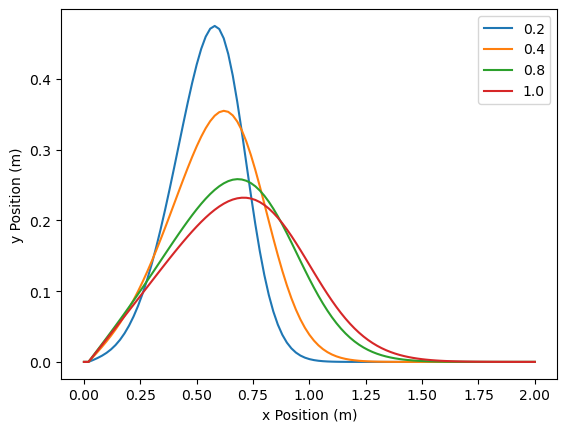

In [289]:
### initialization ###
U = np.zeros(N+1)
U1 = U
U[1:N] =  1 * np.exp(-(X[1:N]-0.5)**2/0.01) 
U_1 = U
   
runt = 1
t = 0
    
while t < runt:
    U, U_1 = leapfrog2(U,U_1)
    t += delt
    if t == 0 or round(t,4) % 0.2 == 0:
        py.plot(X,U, label = round(t,2))
py.plot(X,U,label = round(t,2))    
py.xlabel("x Position (m)")
py.ylabel("y Position (m)")
py.legend()
py.show()

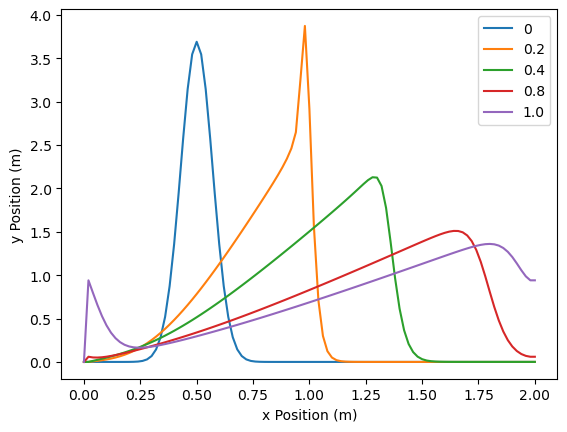

In [285]:
### initialization ###
U = np.zeros(N+1)
U1 = U
U[1:N] =  3.689 * np.exp(-(X[1:N]-0.5)**2/0.01) # for some unknown reason I keep getting multiplicative errors here. any A >= 3.69 returns errors
U_1 = U
   
runt = 1
t = 0
py.plot(X,U,label = round(t,2))    
while t < runt:
    U, U_1 = leapfrog2(U,U_1)
    t += delt
    if round(t,4) % 0.2 == 0:
        py.plot(X,U, label = round(t,2))
py.plot(X,U,label = round(t,2))    
py.xlabel("x Position (m)")
py.ylabel("y Position (m)")
py.legend()
py.show()

As amplitude increases the sharpness of the initial wave becomes more apparent. The wave itself increases in speed, with it essentially reaching the end of the "rope".  This makes sense as a taller wave has more potential energy stored in it, which it can exchange for greater kinetic energy.